# **Tabular Data & MLP**

## Construire le modèle avec nn.Module - Regression Logistique

- https://github.com/hichoe95/Iris-classification/blob/master/pytorch/iris.ipynb
- https://github.com/cserajdeep/1DCNN-IRIS-PyTorch/blob/main/1DCNN_IRIS_Pytorch.ipynb
- https://github.com/lschmiddey/PyTorch-Multiclass-Classification/blob/master/Multiclass_Classification_on_Iris_dataset_with_Initialization_and_Dropout.ipynb
- https://github.com/CosmoSt4r/Iris-Classification/blob/master/classifier/classifier.py
- https://github.com/xiaoxiao8201/class_iris/blob/main/yuan_wei_hua.ipynb
- https://github.com/polasha/Basic-Pytorch-Neural-Network-with-Iris-dataset
- https://github.com/parthbatra/pytorch-iris/blob/master/main.py
- https://github.com/SwamiKannan/Iris-classification-using-PyTorch
-

- https://firiuza.medium.com/deep-neural-networks-for-tabular-data-b0495c167c8

## **Installation des modules nécessaires**

- ### Afin de récupérer les données via Python, nous avons besoin d'installer ucimlrepo


In [1]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.6.20
    Uninstalling certifi-2020.6.20:
      Successfully uninstalled certifi-2020.6.20
Note: you may need to restart the kernel to use updated packages.


- ### Pour réaliser des modèles d'apprentissage, nous avons besoin de Pytorch

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


## IMPORTATION DES MODULES

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import json
import os
import shutil
import random

## Récupération des données abalone provenant de ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X_value = abalone.data.features 
y_value = abalone.data.targets 

print(f"=> Les données dans X:\n========\n{X_value}\n")

print(f"\n=>Les données dans y:\n========\n{y_value}")

=> Les données dans X:
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3           

- ### Renseignement/Informations sur les données

In [3]:
# variable information 
print(abalone.keys())

dict_keys(['data', 'metadata', 'variables'])


In [4]:
# data information 
print(abalone.data)

{'ids': None, 'features':      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3        

In [4]:
# metadata 
print(abalone.metadata)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [5]:
# variables 
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

- ### Transformation des données dans une dataframe à l'aide de Pandas

In [28]:
df = pd.concat([X_value,y_value], axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
print(f"df.shape : {df.shape}")
print(f"nombre row : {df.shape[0]}")
print(f"nombre column : {df.shape[1]}")

df.shape : (4177, 9)
nombre row : 4177
nombre column : 9


In [30]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [31]:
# Transformer les espèces en valeurs numériques
dataset_1 = df.copy()
dataset_1.loc[dataset_1.Sex == 'M', 'Sex'] = 0
dataset_1.loc[dataset_1.Sex == 'F', 'Sex'] = 1
dataset_1.loc[dataset_1.Sex == 'I', 'Sex'] = 2

# Conversion en type numérique
dataset_1['Sex'] = pd.to_numeric(dataset_1['Sex'])

dataset_1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
# Transformer les espèces en valeurs numériques
dataset_2 = df[df.columns[0:7]]
dataset_2['Sex_1'] = np.where(dataset_2['Sex']=='M', 1, -1)
dataset_2['Sex_2'] = np.where(dataset_2['Sex']=='F', 1, -1)
dataset_2 = dataset_2[dataset_2.columns[1:9]]
dataset_2 = pd.concat([dataset_2, y_value], axis=1)

dataset_2

C:\Users\laeti\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Sex_1,Sex_2,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,1,-1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,1,-1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,-1,1,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,1,-1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,-1,-1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,-1,1,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,1,-1,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,1,-1,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,-1,1,10


## Construire le modèle avec nn.Module - Regression Logistique

In [33]:
# Définir le modèle de régression logistique ordinale
class RegressionLogistiqueOrdinale(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionLogistiqueOrdinale, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

- ### avec la 1ere transformation de données : dataset_1

Époque 1/100, Perte: 3.2310400009155273
Époque 11/100, Perte: 2.4458179473876953
Époque 21/100, Perte: 2.2708253860473633
Époque 31/100, Perte: 2.3994860649108887
Époque 41/100, Perte: 2.417325735092163
Époque 51/100, Perte: 1.8371508121490479
Époque 61/100, Perte: 2.2906792163848877
Époque 71/100, Perte: 2.082681655883789
Époque 81/100, Perte: 2.261061191558838
Époque 91/100, Perte: 2.640486478805542


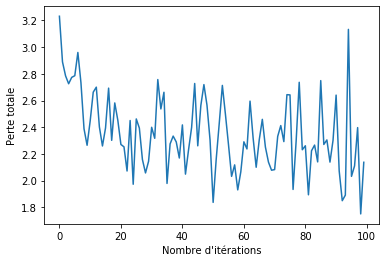

Précision du modèle sur les données de test :  0.24132151901721954


In [38]:
# Conversion des DataFrame en TensorDataset
features = torch.tensor(dataset_1.drop(columns=['Rings']).values).float()
targets = torch.tensor(dataset_1['Rings'].values).long()
tensor_dataset = TensorDataset(features, targets)

# Division du dataset en ensemble d'entraînement et de test
train_size = int(0.8 * len(tensor_dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(tensor_dataset, [train_size, test_size])

# Création des DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
input_dim = features.shape[1]
output_dim = dataset_1['Rings'].max().item() + 1  # Ajuster le nombre de classes
model = RegressionLogistiqueOrdinale(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entraînement du modèle
epochs = 100
losses = []  # Liste pour stocker les valeurs de perte

for epoch in range(epochs):
    model.train()
    for i, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())  # Ajouter la perte à la liste

    if epoch % 10 == 0:
        print(f"Époque {epoch+1}/{epochs}, Perte: {loss.item()}")

# Affichage de la perte au fil des itérations
plt.plot(losses)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Perte totale")
plt.show()

# Évaluation du modèle
model.eval()
with torch.no_grad():
    # Préparer les données de test complètes
    test_features = torch.tensor(dataset_1.drop(columns=['Rings']).values).float()
    test_targets = torch.tensor(dataset_1['Rings'].values).long()

    # Prédiction
    y_pred = model(test_features)
    _, predictions = torch.max(y_pred, 1)
    accuracy = (predictions == test_targets).float().mean()
    print("Précision du modèle sur les données de test : ", accuracy.item())


- ### avec la 2e transformation de données : dataset_2

Époque 1/100, Perte: 3.376944065093994
Époque 11/100, Perte: 2.63733172416687
Époque 21/100, Perte: 2.421412944793701
Époque 31/100, Perte: 2.217766046524048
Époque 41/100, Perte: 2.6829543113708496
Époque 51/100, Perte: 2.2700350284576416
Époque 61/100, Perte: 1.8571288585662842
Époque 71/100, Perte: 2.3618597984313965
Époque 81/100, Perte: 1.9747729301452637
Époque 91/100, Perte: 2.3573527336120605


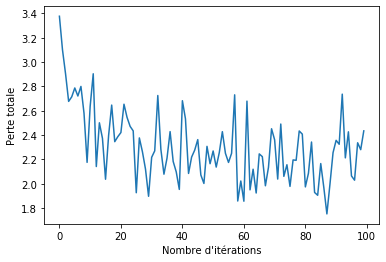

Précision du modèle sur les données de test :  0.22129186987876892


In [39]:
# Conversion des DataFrame en TensorDataset
features = torch.tensor(dataset_2.drop(columns=['Rings']).values).float()
targets = torch.tensor(dataset_2['Rings'].values).long()
tensor_dataset = TensorDataset(features, targets)

# Division du dataset en ensemble d'entraînement et de test
train_size = int(0.8 * len(dataset_2))
test_size = len(dataset_2) - train_size
train_dataset, test_dataset = random_split(tensor_dataset, [train_size, test_size])

# Création des DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
input_dim = features.shape[1]
output_dim = targets.max().item() + 1  # Ajuster le nombre de classes
model = RegressionLogistiqueOrdinale(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entraînement du modèle
epochs = 100
losses = []  # Liste pour stocker les valeurs de perte

for epoch in range(epochs):
    model.train()
    for i, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())  # Ajouter la perte à la liste

    if epoch % 10 == 0:
        print(f"Époque {epoch+1}/{epochs}, Perte: {loss.item()}")

# Affichage de la perte au fil des itérations
plt.plot(losses)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Perte totale")
plt.show()

# Évaluation du modèle
model.eval()
with torch.no_grad():
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
    for x, y in test_loader:
        test_features = x
        test_targets = y

    # Prédiction
    y_pred = model(test_features)
    _, predictions = torch.max(y_pred, 1)
    accuracy = (predictions == test_targets).float().mean()
    print("Précision du modèle sur les données de test : ", accuracy.item())
